<a href="https://colab.research.google.com/github/arad4228/BigData_and_A.I/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%91%EC%9A%A9(5%EC%9B%94_26%EC%9D%BC_%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_iris

idata = load_iris()

print(dir(idata))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [29]:
from matplotlib import pyplot as plt
import numpy

X = idata.data
y = idata.target
n = X.shape[0]
w = X[:,0]
x = X[:,1]
y = X[:,2]
z = X[:,3]

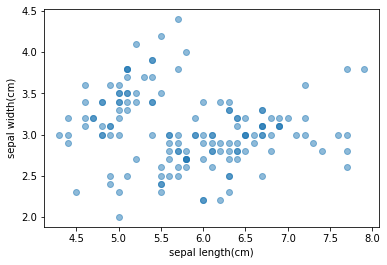

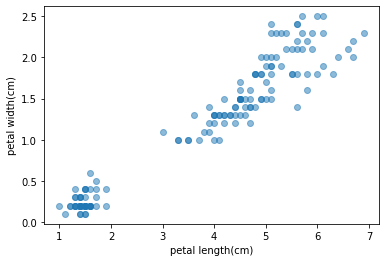

In [30]:
plt.scatter(w, x, alpha = 0.5)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

plt.scatter(y,z, alpha = 0.5)
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.show()

pick K random points as centroids

In [31]:
import numpy as np
k = 3

centroids_w = np.random.uniform(min(w), max(w), k)
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids_z = np.random.uniform(min(z), max(z), k)
centroids = list(zip(centroids_w, centroids_x, centroids_y, centroids_z))
centroids = np.array(centroids)
print(centroids)

[[4.83783709 4.252538   4.8878582  1.42509008]
 [5.07701231 2.63177318 4.53172197 0.45513582]
 [6.39395522 3.23308221 3.51062115 2.01903761]]


기초 거리함수

In [32]:
def distance(a,b):
  alen = len(a)
  sum = 0
  for aidx in range(alen):
    sum += (a[aidx] - b[aidx])**2
  return sum**0.5

초기화

In [33]:
from copy import deepcopy

labels = np.zeros(n)
points = np.array(list(zip(w, x, y, z)))

centroids_old = np.zeros(centroids.shape)
error = np.zeros(k)
error_old = deepcopy(error)

기본구조

In [34]:
# Error 초기화
for i in range(k):
  error[i] = distance(centroids_old[i], centroids[i])

idx = 0

while( error.any() != 0):
  #(2) 가장 가까운 centroid로 point를 clustering
  for i in range(n):
    distances = np.zeros(k)
    for j in range(k):
      distances[j] = distance(points[i], centroids[j])
    labels[i] = np.argmin(distances)

  #(3) 새로운 centroid를 계산
  centroids_old = deepcopy(centroids)
  for i in range(k):
    point = []
    for j in range(n):
      if(labels[j] == i):
        point.append(points[j])
    centroids[i] = np.mean(point, axis=0)

  error_old = error
  for j in range(k):
    error[j] = distance(centroids_old[j], centroids[j])

  print(idx, "times error:", error)
  idx +=1

0 times error: [2.09363654 1.33587057 0.87766976]
1 times error: [0.64511048 1.56839888 0.63465055]
2 times error: [0.23399746 0.46078816 0.20490442]
3 times error: [0.03341124 0.08115549 0.04527571]
4 times error: [0. 0. 0.]


skleanrn

In [48]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(points)

print(idata.target)
print(model.labels_)

cnt = 0

for i in range(len(idata.target)):
  cnt += (idata.target[i] == model.labels_[i])

print(cnt/len(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.8933333333333333
